# Project Overview
## Basic DNN Training
- Implement and train a DNN to classify street signs in the GTSRB dataset
- provide a <b> class confusion matrix </b> showing relative distribution (in percentages) of classification for each class in each cell (not cardinalities)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!unzip /content/drive/MyDrive/GTSRB_Final_Training_Images.zip

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

# Helper Functions

In [ ]:
from collections import Counter

def view_data_distribution(dataset):
    distribution = dict(Counter(dataset.targets))
    
    keys = list(distribution.keys())
    values = list(distribution.values())

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_title('GTSRB Data Imbalances')
    ax.set_xlabel('Example count (int)')
    ax.set_ylabel('Classes (int)')

    ax.barh(keys, values)

    for index, value in enumerate(values):
        plt.text(value, index, str(value))
    print(type(fig))

    fig.savefig('data_imbalance', dpi=300)
    fig.show()

def imshow(img):
  img = img/ 2 + 0.5
  # npimg = img.numpy()
  plt.imshow(np.transpose(img[0].numpy(), (1,2,0)))
  plt.show()

# Define Transformations
Very basic tranformation - only perform resize, conversion, and normalization.

In [ ]:
transform = transforms.Compose([
                                transforms.Resize([32, 32]),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])
])

# Load Dataset & View distribution

In [ ]:
dataset = datasets.ImageFolder("/content/GTSRB/Final_Training/Images",transform=transform)

<class 'torchvision.datasets.folder.ImageFolder'>
<class 'matplotlib.figure.Figure'>


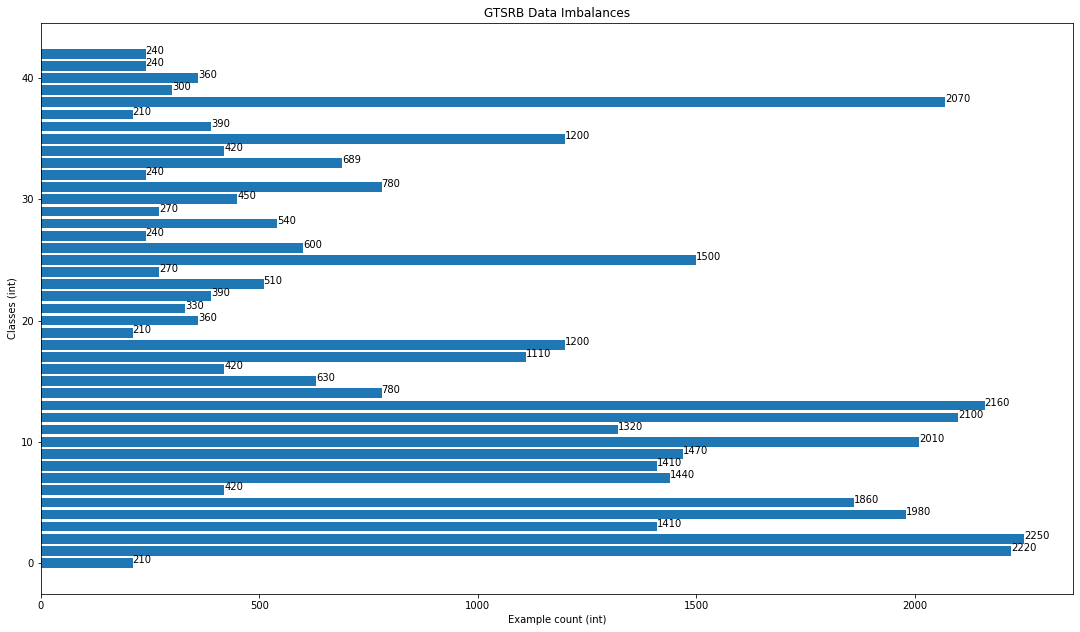

In [ ]:
print(type(dataset))

view_data_distribution(dataset)

# Train-Test Split

In [ ]:
dataset_size = dataset.__len__()

train_count = int(dataset_size * 0.80)
valid_test_count = dataset_size - train_count

valid_count = int(valid_test_count * 0.5)
test_count = valid_test_count - valid_count

train_set, valid_set, test_set = torch.utils.data.random_split(dataset, [train_count, valid_count, test_count])

print(train_set.__len__(), valid_set.__len__(), test_set.__len__())
print("Total: ", train_set.__len__() + valid_set.__len__() +test_set.__len__())

31367 3921 3921
Total:  39209


# Loading into DataLoaders

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=32,
                                           num_workers=2,
                                           drop_last=True,
                                           shuffle=True
                                          )

valid_loader = torch.utils.data.DataLoader(valid_set,
                                           batch_size=32,
                                           num_workers=2,
                                           drop_last=True,
                                           shuffle=True
                                           )

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=32,
                                          num_workers=2,
                                          drop_last=True,
                                          shuffle=True,
                                         )

# Simple Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

nclasses = 43

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1    = nn.Conv2d(3, 100, 5)
        self.conv1_bn = nn.BatchNorm2d(100)
        self.pool     = nn.MaxPool2d(2, 2)

        self.conv2    = nn.Conv2d(100, 150, 3)
        self.conv2_bn = nn.BatchNorm2d(150)

        self.conv3    = nn.Conv2d(150, 250, 1)
        self.conv3_bn = nn.BatchNorm2d(250)

        self.fc1      = nn.Linear(250 * 3 * 3, 350)
        self.fc1_bn   = nn.BatchNorm2d(350)

        self.fc2      = nn.Linear(350, nclasses)

    def forward(self, x):

        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = self.pool(F.elu(self.conv3(x)))
        x = x.view(-1, 250 * 3 * 3)
        x = F.elu(self.fc1(x))
        x = self.fc2(x)

        return x

# Display the Training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


43


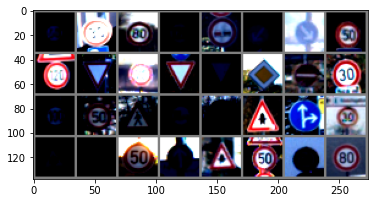

Speed limit (60km/h)|Speed limit (30km/h)|Speed limit (80km/h)|Speed limit (120km/h)|No Passing|Keep Left|Keep right|Speed limit (50km/h)|Speed limit (120km/h)|Yield|Speed limit (70km/h)|Yield|Yield|Priority road|No entry|Speed limit (30km/h)|Speed limit (100km/h)|Speed limit (50km/h)|Pedestrians|No passing for vehicles over 3.5 metric tons|Speed limit (60km/h)|Right-of-way at the next intersection|Go Straight or Right|Speed limit (30km/h)|Beware of ice/snow|No entry|Speed limit (50km/h)|Ahead only|Right-of-way at the next intersection|Speed limit (50km/h)|Speed limit (120km/h)|Speed limit (80km/h)


In [ ]:
def imshow(img):
  img = img/ 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(train_loader)
classes = ("Speed limit (20km/h)", "Speed limit (30km/h)" , "Speed limit (50km/h)", "Speed limit (60km/h)",
           "Speed limit (70km/h)" , "Speed limit (80km/h)", "End of Speed Limit (80km/h)", "Speed limit (100km/h)",
           "Speed limit (120km/h)", "No Passing", "No passing for vehicles over 3.5 metric tons", "Right-of-way at the next intersection",
           "Priority road", "Yield", "Stop", "No Vehicles",
           "Vehicles over 3.5 metric tons prohibited", "No entry", "General Caution", "Dangerous curve to the left",
           "Dangerous curve to the right", "Double Curve", "Bumpy Road", "Slippery Road",
           "Road narrows on the right", "Road work", "Traffic signals", "Pedestrians", 
           "Children Crossing", "Bicycles crossing", "Beware of ice/snow","Wild animals crossing",
           "End of all speed and passing limit", "Turn right ahead", "Turn left ahead", "Ahead only", 
           "Go Straight or Right", "Go Straight or Left", "Keep right", "Keep Left", 
            "Roundabout Mandatory", "End of no passing", "End of no passing by vehicles over 3.5 metric tons")

print(len(classes))
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('|'.join(f'{classes[labels[j]]:5s}' for j in range(32)))

# Instantiate CNN - Set up to train via GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = Net()
model = model.to(device)

cuda


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001, momentum=0.9)

In [ ]:
import time

n_epoch = 10

train_loss_plot = []
train_acc_plot = []
valid_loss_plot = []
valid_acc_plot = []

t1 = time.perf_counter()
for epoch in range(n_epoch):

  train_loss = 0.0
  train_correct = 0
  train_total = 0

  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    _, predicted = torch.max(outputs.data, 1)

    loss = criterion(outputs, labels)

    train_total += labels.size(0)
    train_correct += (predicted == labels).sum().item()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()


  valid_loss = 0.0
  valid_correct = 0
  valid_total = 0
  model.eval()
  for i, data in enumerate(valid_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)

    _, predicted = torch.max(outputs.data, 1)

    loss = criterion(outputs, labels)

    valid_total += labels.size(0)
    valid_correct += (predicted == labels).sum().item()

    valid_loss += loss.item()

  
  print(f'Epoch {epoch + 1} \t Training Loss: {(train_loss / len(train_loader)):.4f} \
                               Training Acc: {(train_correct / train_total):.4f} \
                               Validation Loss: {(valid_loss / len(valid_loader)):.4f} \
                               Validation Acc: {(valid_correct / valid_total):.4f}')

  train_loss_plot.append(round(train_loss / len(train_loader), 4))
  train_acc_plot.append(round(train_correct / train_total, 4))
  valid_loss_plot.append(round(valid_loss / len(valid_loader), 4))
  valid_acc_plot.append(round(valid_correct / valid_total, 4))

t2 = time.perf_counter()

print(f'Finished Training in {int(t2-t1)} seconds')

Epoch 1 	 Training Loss: 2.6271                                Training Acc: 0.2934                                Validation Loss: 1.5467                                Validation Acc: 0.5438
Epoch 2 	 Training Loss: 1.0239                                Training Acc: 0.6959                                Validation Loss: 0.6289                                Validation Acc: 0.8184
Epoch 3 	 Training Loss: 0.4655                                Training Acc: 0.8708                                Validation Loss: 0.3420                                Validation Acc: 0.9034
Epoch 4 	 Training Loss: 0.2761                                Training Acc: 0.9255                                Validation Loss: 0.2297                                Validation Acc: 0.9390
Epoch 5 	 Training Loss: 0.1832                                Training Acc: 0.9530                                Validation Loss: 0.1581                                Validation Acc: 0.9590
Epoch 6 	 Training Loss: 0.1283    

In [ ]:
epoch_count = range(1, n_epoch + 1)

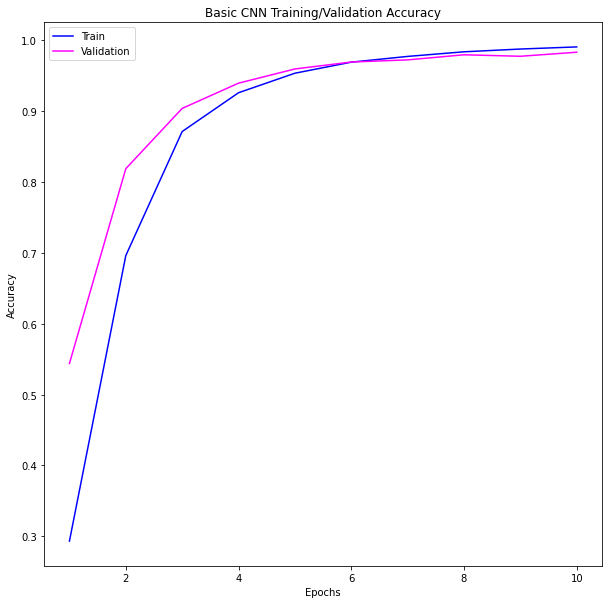

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(epoch_count, train_acc_plot, color='blue', label='Train')
plt.plot(epoch_count, valid_acc_plot, color='magenta', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Basic CNN Training/Validation Accuracy')
plt.savefig('basic_accuracy.png', dpi=300)

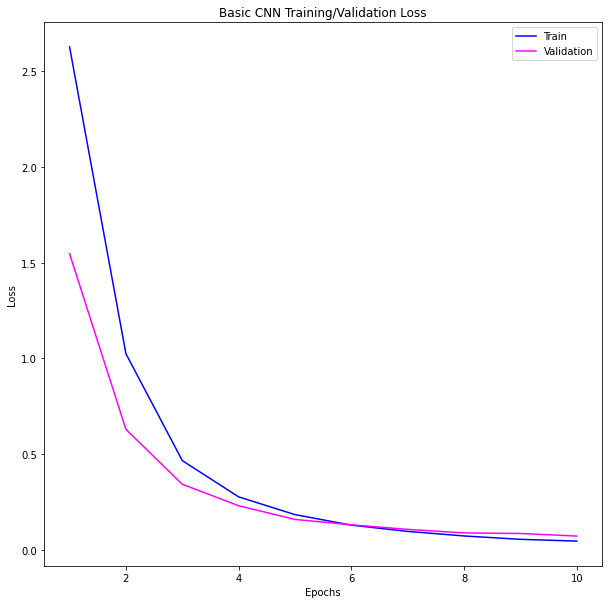

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(epoch_count, train_loss_plot, color='blue', label='Train')
plt.plot(epoch_count, valid_loss_plot, color='magenta', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Basic CNN Training/Validation Loss')
plt.savefig('basic_loss.png', dpi=300)

In [ ]:
PATH = './custom_network.pth'
torch.save(model.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


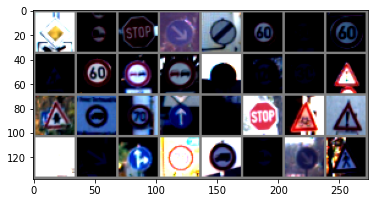

GroundTruth:  Priority road|No passing for vehicles over 3.5 metric tons|Stop |Keep right|End of all speed and passing limit|Speed limit (60km/h)|Speed limit (80km/h)|Speed limit (60km/h)|Road work|Speed limit (60km/h)|No Passing|No Passing|Speed limit (60km/h)|Speed limit (120km/h)|Speed limit (30km/h)|Traffic signals|Right-of-way at the next intersection|Vehicles over 3.5 metric tons prohibited|Speed limit (70km/h)|Ahead only|End of Speed Limit (80km/h)|Stop |Bicycles crossing|General Caution|Right-of-way at the next intersection|Keep right|Go Straight or Right|Speed limit (70km/h)|Vehicles over 3.5 metric tons prohibited|No passing for vehicles over 3.5 metric tons|Keep right|Pedestrians


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', '|'.join(f'{classes[labels[j]]:5s}' for j in range(32)))

In [ ]:
model = Net()

model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

nb_classes = 43

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for index, data in enumerate(test_loader):
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for t, p in zip(labels.view(-1), predicted.view(-1)):
          confusion_matrix[t.long(), p.long()] += 1

print(f'Accuracy of the network on the {total} test images: {round(100 * correct / total, 4)} %')

Accuracy of the network on the 3904 test images: 98.1301 %


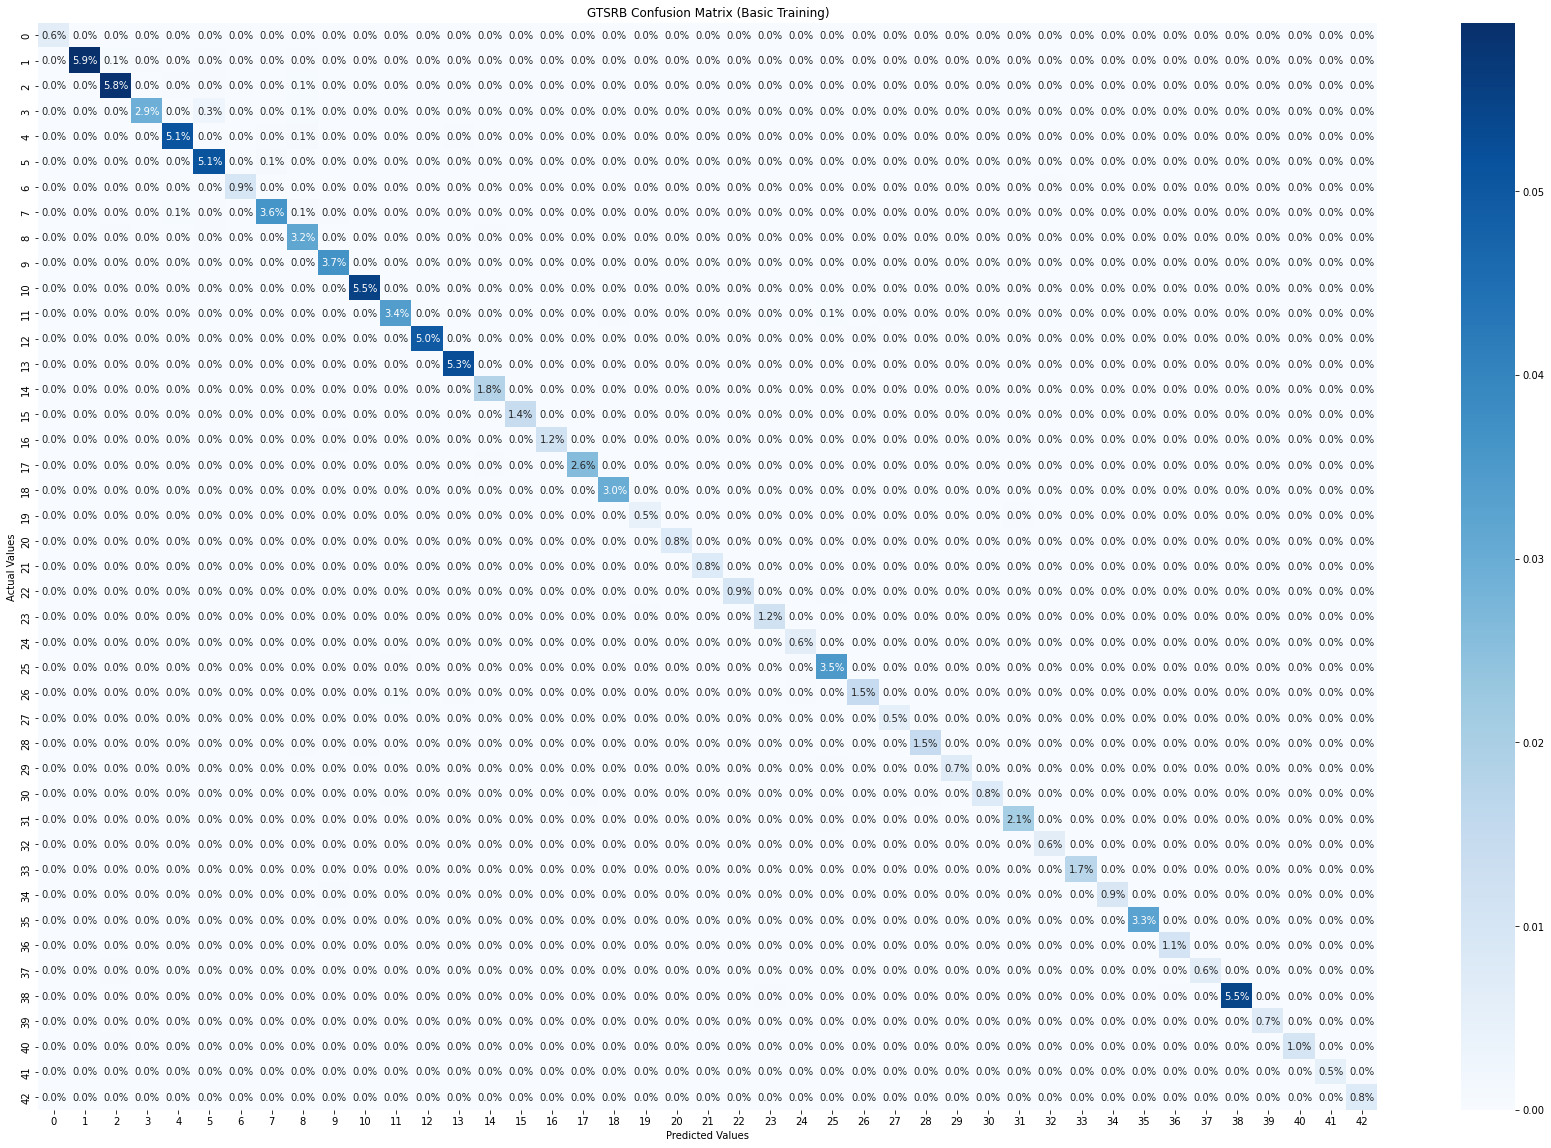

In [ ]:
import seaborn as sns

normalized_cf = confusion_matrix / torch.sum(confusion_matrix)

fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

ax = sns.heatmap(normalized_cf, annot=True, fmt='.1%', cmap="Blues")

ax.set_title('GTSRB Confusion Matrix (Basic Training)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')


plt.savefig('confusion_matrix_GTSRB.png', dpi=300)
fig.show()